<a href="https://colab.research.google.com/github/fatmaaerr/AMD_Ukraine_Conflict_Market_Basket_A/blob/main/Apiori__Algorithms__MDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

import csv
import glob


In [3]:
# Kaggle API to download the dataset
import os
kaggle_api = {"username":"fatmaer","key":"02db3447e0d87603a7e4cb10816fe1b7"}
os.environ['KAGGLE_USERNAME'] = kaggle_api['username']
os.environ['KAGGLE_KEY'] = kaggle_api['key']

In [4]:
# Kaggle authentication and download
import kaggle
kaggle.api.authenticate()
!  kaggle datasets download BWANDOWANDO/ukraine-russian-crisis-twitter-dataset-1-2-m-rows

100% 13.1G/13.1G [01:31<00:00, 169MB/s]
100% 13.1G/13.1G [01:31<00:00, 154MB/s]


In [5]:
! unzip ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip

Archive:  ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip
  inflating: 0819_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0820_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0821_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0822_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0823_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0824_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0825_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0826_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0827_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0828_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0829_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0830_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0831_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0901_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0902_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0903_UkraineCombinedTweetsDeduped.csv.gzip  
  inflat

# Importing data , analysis and visualization

In [6]:
read_file = ["UkraineWar/UkraineWar/UkraineCombinedTweetsDeduped_MAR10.csv.gzip"]

In [9]:
collect_file = []
columns = ["userid","text","language",'retweetcount']
for data in read_file:

  df = pd.read_csv(data, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL, low_memory=False)
  df= df[columns]
  collect_file.append(df)
  print(f"The data {data} has {len(df)} number of rows ")

The data UkraineWar/UkraineWar/UkraineCombinedTweetsDeduped_MAR10.csv.gzip has 460075 number of rows 


In [10]:
collect_file=df

In [11]:
#null control

df.isnull().sum()

userid          0
text            0
language        0
retweetcount    0
dtype: int64

In [12]:
df["language"].value_counts().head(5)

en    303769
fr     26510
de     23488
it     23256
es     20751
Name: language, dtype: int64

In [13]:
df

,userid,text,language,retweetcount
4557550,382303683,This #Russia-dropped bomb would flatten a buil...,en,6572
4557551,1433449200470032385,#Zelensky:\n\nThere was little Bandera there? ...,en,25
4557552,3689308343,@SecBlinken If the horrific attacks on #Ukrain...,en,1
4557553,567289542,Thousands of residents from the northeastern #...,en,0
4557554,1276373615466799104,"In 2 hours, we are #streaming 3 #indiegames fr...",en,1
...,...,...,...,...
5017620,46023832,"'Fading' \n\n""War is only a cowardly escape fr...",en,9
5017621,27004493,#UKRAINE WHAT IS USA doing to take in refugee ...,en,0
5017622,2612775241,"🔴 Due to russian aggression against #Ukraine, ...",en,75
5017623,867067128,ULTIMA HORA: #Rusia acaba de atacar el Institu...,es,596


In [14]:
df2 =  df[df["language"] == "en"]
df2.shape

(303769, 4)

In [15]:
df2

,userid,text,language,retweetcount
4557550,382303683,This #Russia-dropped bomb would flatten a buil...,en,6572
4557551,1433449200470032385,#Zelensky:\n\nThere was little Bandera there? ...,en,25
4557552,3689308343,@SecBlinken If the horrific attacks on #Ukrain...,en,1
4557553,567289542,Thousands of residents from the northeastern #...,en,0
4557554,1276373615466799104,"In 2 hours, we are #streaming 3 #indiegames fr...",en,1
...,...,...,...,...
5017618,397469365,"Little girl singing ""Let it go"" in a shelter\n...",en,74898
5017619,1323869257407614977,@RWApodcast Attacks are only going to intensif...,en,0
5017620,46023832,"'Fading' \n\n""War is only a cowardly escape fr...",en,9
5017621,27004493,#UKRAINE WHAT IS USA doing to take in refugee ...,en,0


In [16]:
sorted_tweets = df2[['userid', 'text', 'retweetcount' ]].sort_values(by = 'text', ascending=False).head(50)

In [17]:
sorted_tweets

,userid,text,retweetcount
4780007,1438838621348499456,"🪵Also, until the end of the year, the export o...",0
4860664,1081840114828017664,🪙💍🛍️👠🚁🛳️⛷️\n\nA new wave of Russian oligarchs ...,0
4682570,1403264108,🪖TRUMP &amp; THE @GOP'S HERO #PUTIN IS SO SMAR...,1
4675837,20679566,🪖Good Morning WAR DAY Nr. 15🪖\n 🇺🇦🇺🇦🇺🇦🇺🇦🇺🇦🇺🇦...,0
4911606,708880659293585408,🪖 C'est #RUSSIE VS #Ukraine \nou WORLD VS #Pu...,0
4735296,1920575366,🪖 #Nintendo has delayed #AdvanceWars 1+2 Re-Bo...,0
4775491,750670310,🧵by @jacopo_iacoboni - some history-\n«Interna...,6
4761039,793367160341094400,🧵by @jacopo_iacoboni - some history-\n«Interna...,4
4724296,1302379208883105794,🧵by @jacopo_iacoboni - some history-\n«Interna...,2
4722142,930419292,🧵by @jacopo_iacoboni - some history-\n«Interna...,2


In [18]:
df2.drop_duplicates(subset=['text'],keep='last',inplace=True)
df2.shape

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(92842, 4)

In [19]:
df2

,userid,text,language,retweetcount
4557555,1421921881528016896,https://t.co/bBIaxUIwpv\n\nAndrew Cahn and Ken...,en,0
4557558,857684571537760260,"""One of the first victims of war is agricultur...",en,0
4557559,2190329623,Older people make up a third of all people in ...,en,0
4557561,41670073,Rabobank: #Ukraine crisis will have ripple eff...,en,0
4557564,49475701,Tourism industries in #Turkey and #Egypt may b...,en,0
...,...,...,...,...
5017618,397469365,"Little girl singing ""Let it go"" in a shelter\n...",en,74898
5017619,1323869257407614977,@RWApodcast Attacks are only going to intensif...,en,0
5017620,46023832,"'Fading' \n\n""War is only a cowardly escape fr...",en,9
5017621,27004493,#UKRAINE WHAT IS USA doing to take in refugee ...,en,0


In [20]:
rslt_df = df2[df2['retweetcount'] >5] 

In [21]:
rslt_df

,userid,text,language,retweetcount
4557585,1468620673115373569,I'm still trying to work out how I decided the...,en,28
4557594,18017198,"#russianinvasion: ""We don't know if we'll be ...",en,7
4557615,428323945,Pakistani 🇵🇰 student Asma Shafique thanking In...,en,10
4557628,1342426416441397250,Every secret finally makes its way out to the ...,en,53
4557639,1274700467545784320,#DidYouKnow?.\n\n#Holdersairdrop is a type of ...,en,9
...,...,...,...,...
5017616,522378309,Russian Mission asked for a meeting of #Securi...,en,156
5017617,205864193,Coming up tonight on @thereidout:\n\n+Maksym B...,en,9
5017618,397469365,"Little girl singing ""Let it go"" in a shelter\n...",en,74898
5017620,46023832,"'Fading' \n\n""War is only a cowardly escape fr...",en,9


In [ ]:
#Text preprocessing

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import json

import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install emoji --upgrade
import emoji

!pip install tweet-preprocessor
import preprocessor as p

# !pip install -U spacy
# !pip install texthero
# import texthero as hero

!pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=7de5d0a1ce1f9c37cea752f4a376278f3f9cfe4afcb90c29961ca03f53d4c04e
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 39.9 MB/s 
     |████████████████████████████████| 182 kB 80.6 MB/s 


Change the dtypes of usercreatedts, tweetcreatedts, and extractedts to datetime64 for easier operation later.


In [1]:
#Data processing & cleaning
#Step A : Converting html entities
##Step B : Removing "@user" from all the tweets
#Step C : Changing all the tweets into lowercase
#Step D : Apostrophe Lookup
#Step E : Short Word Lookup
#Step F : Emoticon Lookup
#Step H : Replacing Special Characters with space
#Step I : Replacing Numbers (integers) with space
#Step J : Removing words whom length is 1

In [23]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [24]:
rslt_df['text'] = rslt_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

<ipython-input-24-9f453f77b3a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['text'] = rslt_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [25]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    #text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
   # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    #text = [word for word in text.split(' ') if word not in stopword]
    #text=" ".join(text)
    #text = [stemmer.stem(word) for word in text.split(' ')]
    #text=" ".join(text)
    return text
rslt_df['text']=rslt_df['text'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-25-bc5019e3185c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['text']=rslt_df['text'].apply(clean)


https://www.kaggle.com/code/gauravchhabra/nlp-twitter-sentiment-analysis-project

In [27]:

rslt_df 

,userid,text,language,retweetcount
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9
...,...,...,...,...
5017616,522378309,russian mission asked for a meeting of #securi...,en,156
5017617,205864193,coming up tonight on @thereidout: +maksym boro...,en,9
5017618,397469365,"little girl singing ""let it go"" in a shelter #...",en,74898
5017620,46023832,"'fading' ""war is only a cowardly escape from t...",en,9


In [28]:
#Step A : Converting html entities


In [29]:
data=rslt_df

In [30]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [31]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
data['clean_tweet'] = data['text'].apply(lambda x: html_parser.unescape(x))
data.head(10)

<ipython-input-31-691d39ab4c4f>:2: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  data['clean_tweet'] = data['text'].apply(lambda x: html_parser.unescape(x))
<ipython-input-31-691d39ab4c4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet'] = data['text'].apply(lambda x: html_parser.unescape(x))


,userid,text,language,retweetcount,clean_tweet
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,i'm still trying to work out how i decided the...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,"#russianinvasion: ""we don't know if we'll be a..."
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani 🇵🇰 student asma shafique thanking in...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,#didyouknow?. #holdersairdrop is a type of #ai...
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intel...
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied #ukraine then ever...
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,#ukrainian forward observers (artillery spotte...
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,"😨 no no no no… currently, until the # has been..."
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt @maryam_rajavi we celebrate # in the name o...


In [32]:
custom_stop_word_list=['ukraine','russia','ukrainian','russian','chinese']

In [33]:
custom_stop_word_list=['ukraine','russia','ukrainian','russian','chinese']
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Loading Stopwords into a list
NLTK_stop_words_list=stopwords.words('english')
print(NLTK_stop_words_list)
print("Total numbers of stop words are ")
print(len(NLTK_stop_words_list))

final_stopword_list = custom_stop_word_list + NLTK_stop_words_list

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
final_stopword_list = custom_stop_word_list + NLTK_stop_words_list

In [35]:
final_stopword_list

['ukraine',
 'russia',
 'ukrainian',
 'russian',
 'chinese',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'whe

In [36]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    #text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
   # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    #text = [word for word in text.split(' ') if word not in stopword]
    #text=" ".join(text)
    #text = [stemmer.stem(word) for word in text.split(' ')]
    #text=" ".join(text)
    return text
data['clean_tweet'] = data['text'].apply(clean)
data.head(10)

<ipython-input-36-ee4749db7eda>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet'] = data['text'].apply(clean)


,userid,text,language,retweetcount,clean_tweet
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,i'm still trying to work out how i decided the...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,"#russianinvasion: ""we don't know if we'll be a..."
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani 🇵🇰 student asma shafique thanking in...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,#didyouknow?. #holdersairdrop is a type of #ai...
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intel...
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied #ukraine then ever...
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,#ukrainian forward observers (artillery spotte...
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,"😨 no no no no… currently, until the # has been..."
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt @maryam_rajavi we celebrate # in the name o...


In [37]:
#Step B : Removing "@user" from all the tweets

In [38]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [39]:
# remove twitter handles (@user)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "@[\w]*")
data.head(10)

<ipython-input-39-833217b840f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "@[\w]*")


,userid,text,language,retweetcount,clean_tweet
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,i'm still trying to work out how i decided the...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,"#russianinvasion: ""we don't know if we'll be a..."
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani 🇵🇰 student asma shafique thanking in...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,#didyouknow?. #holdersairdrop is a type of #ai...
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intel...
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied #ukraine then ever...
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,#ukrainian forward observers (artillery spotte...
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,"😨 no no no no… currently, until the # has been..."
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt we celebrate # in the name of valiant wome...


In [40]:

#Step C : Changing all the tweets into lowercase

In [41]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: x.lower())
data.head(10)

<ipython-input-41-b937b62e9e14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet'] = data['clean_tweet'].apply(lambda x: x.lower())


,userid,text,language,retweetcount,clean_tweet
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,i'm still trying to work out how i decided the...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,"#russianinvasion: ""we don't know if we'll be a..."
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani 🇵🇰 student asma shafique thanking in...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,#didyouknow?. #holdersairdrop is a type of #ai...
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intel...
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied #ukraine then ever...
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,#ukrainian forward observers (artillery spotte...
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,"😨 no no no no… currently, until the # has been..."
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt we celebrate # in the name of valiant wome...


In [42]:
#Step D : Apostrophe Lookup

In [43]:
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would","it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not","shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [44]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [45]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
data.head(10)

<ipython-input-45-aa4fd2182535>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))


,userid,text,language,retweetcount,clean_tweet
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,I am still trying to work out how i decided th...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,"#russianinvasion: ""we do not know if we will b..."
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani 🇵🇰 student asma shafique thanking in...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,#didyouknow?. #holdersairdrop is a type of #ai...
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intel...
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied #ukraine then ever...
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,#ukrainian forward observers (artillery spotte...
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,"😨 no no no no… currently, until the # has been..."
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt we celebrate # in the name of valiant wome...


In [46]:
#Step E : Short Word Lookup

In [47]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [48]:

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
data.head(10)

<ipython-input-48-23a600e80aa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))


,userid,text,language,retweetcount,clean_tweet
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,I am still trying to work out how i decided th...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,"#russianinvasion: ""we do not know if we will b..."
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani 🇵🇰 student asma shafique thanking in...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,#didyouknow?. #holdersairdrop is a type of #ai...
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intel...
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied #ukraine then ever...
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,#ukrainian forward observers (artillery spotte...
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,"😨 no no no no… currently, until the # has been..."
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt we celebrate # in the name of valiant wome...


In [49]:
#Step F : Emoticon Lookup

In [50]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{':)': 'happy',
 ':‑)': 'happy',
 ':-]': 'happy',
 ':-3': 'happy',
 ':->': 'happy',
 '8-)': 'happy',
 ':-}': 'happy',
 ':o)': 'happy',
 ':c)': 'happy',
 ':^)': 'happy',
 '=]': 'happy',
 '=)': 'happy',
 '<3': 'happy',
 ':-(': 'sad',
 ':(': 'sad',
 ':c': 'sad',
 ':<': 'sad',
 ':[': 'sad',
 '>:[': 'sad',
 ':{': 'sad',
 '>:(': 'sad',
 ':-c': 'sad',
 ':-< ': 'sad',
 ':-[': 'sad',
 ':-||': 'sad'}

In [51]:


data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
data.head(10)

<ipython-input-51-809f7401449f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))


,userid,text,language,retweetcount,clean_tweet
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,I am still trying to work out how i decided th...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,"#russianinvasion: ""we do not know if we will b..."
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani 🇵🇰 student asma shafique thanking in...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,#didyouknow?. #holdersairdrop is a type of #ai...
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intel...
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied #ukraine then ever...
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,#ukrainian forward observers (artillery spotte...
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,"😨 no no no no… currently, until the # has been..."
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt we celebrate # in the name of valiant wome...


In [52]:
#Step G : ReplacingPunctuations with space

In [53]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
data.head(10)

<ipython-input-53-c8068e0fad66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))


,userid,text,language,retweetcount,clean_tweet
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,I am still trying to work out how i decided th...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,russianinvasion we do not know if we will b...
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani student asma shafique thanking in...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,didyouknow holdersairdrop is a type of ai...
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intel...
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied ukraine then ever...
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,ukrainian forward observers artillery spotte...
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,no no no no currently until the has been...
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt we celebrate in the name of valiant wome...


In [54]:
#Step H : Replacing Special Characters with space

In [55]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
data.head(10)

<ipython-input-55-b6a0d1df506a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))


,userid,text,language,retweetcount,clean_tweet
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,I am still trying to work out how i decided th...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,russianinvasion we do not know if we will b...
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani student asma shafique thanking in...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,didyouknow holdersairdrop is a type of ai...
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intel...
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied ukraine then ever...
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,ukrainian forward observers artillery spotte...
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,no no no no currently until the has been...
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt we celebrate in the name of valiant wome...


In [56]:
#Step I : Replacing Numbers (integers) with space

In [57]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
data.head(10)

<ipython-input-57-4b2ba52f8f7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))


,userid,text,language,retweetcount,clean_tweet
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,I am still trying to work out how i decided th...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,russianinvasion we do not know if we will b...
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani student asma shafique thanking in...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,didyouknow holdersairdrop is a type of ai...
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intel...
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied ukraine then ever...
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,ukrainian forward observers artillery spotte...
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,no no no no currently until the has been...
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt we celebrate in the name of valiant wome...


In [58]:
#Step J : Removing words whom length is 1

In [59]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
#combine_df['clean_tweet'][0:5]
data.head(10)


<ipython-input-59-a7ef0b3c38ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))


,userid,text,language,retweetcount,clean_tweet
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,am still trying to work out how decided the ou...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,russianinvasion we do not know if we will be a...
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani student asma shafique thanking india...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,didyouknow holdersairdrop is type of airdrop g...
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intell...
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied ukraine then every...
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,ukrainian forward observers artillery spotters...
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,no no no no currently until the has been inspe...
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt we celebrate in the name of valiant women o...


In [60]:
#https://www.kaggle.com/code/gauravchhabra/nlp-twitter-sentiment-analysis-project

In [61]:

data['clean_tweet'][0:5]

4557585    am still trying to work out how decided the ou...
4557594    russianinvasion we do not know if we will be a...
4557615    pakistani student asma shafique thanking india...
4557628    every secret finally makes its way out to the ...
4557639    didyouknow holdersairdrop is type of airdrop g...
Name: clean_tweet, dtype: object

In [62]:

#Step K : Spelling Correction - With TextBlob Library
### See how textblob works, short introduction

In [63]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [64]:
# Spelling correction is a cool feature which TextBlob offers, we can be accessed using the correct function as shown below.
blob = TextBlob("Why are you stting on this bech??") # Scentence with two errors
print(blob.correct()) # Correct function give us the best possible word simmilar to "gret"

Why are you sitting on this bench??


In [65]:
# we can see all the similar matches our first error along with the probability score.
blob.words[3].spellcheck()

[('sitting', 0.8078078078078078),
 ('setting', 0.11411411411411411),
 ('string', 0.036036036036036036),
 ('sting', 0.02702702702702703),
 ('stating', 0.015015015015015015)]

In [66]:
#Applying TextBlob on our data set - Spelling correction

In [67]:
# Not cleaning the just showing the spelling check as its take lot of time to process all these tweets
## Shown sample how its must done
text2 = data['clean_tweet'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text2

4557585    am still trying to work out how decided the ou...
4557594    russianinvasion we do not know if we will be a...
4557615    pakistani student asia shafique thanking india...
4557628    every secret finally makes its way out to the ...
4557639    didyouknow holdersairdrop is type of wardrop g...
4557643    russian soldiers are in sudan providing intell...
4557657    if is said this is occupied ukraine then every...
4557684    ukrainian forward observers artillery potters ...
4557690    no no no no currently until the has been inspe...
4557694    it we celebrate in the name of valiant women o...
Name: clean_tweet, dtype: object

In [68]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [69]:

# Creating token for the clean tweets
data['tweet_token'] = data['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
data.head(10)

<ipython-input-69-7bbd122d6be2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_token'] = data['clean_tweet'].apply(lambda x: word_tokenize(x))


,userid,text,language,retweetcount,clean_tweet,tweet_token
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,am still trying to work out how decided the ou...,"[am, still, trying, to, work, out, how, decide..."
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,russianinvasion we do not know if we will be a...,"[russianinvasion, we, do, not, know, if, we, w..."
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani student asma shafique thanking india...,"[pakistani, student, asma, shafique, thanking,..."
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...,"[every, secret, finally, makes, its, way, out,..."
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,didyouknow holdersairdrop is type of airdrop g...,"[didyouknow, holdersairdrop, is, type, of, air..."
4557643,48918874,russian soldiers are in sudan providing intel...,en,8,russian soldiers are in sudan providing intell...,"[russian, soldiers, are, in, sudan, providing,..."
4557657,1214586942936895488,if is said this is occupied #ukraine then ever...,en,52,if is said this is occupied ukraine then every...,"[if, is, said, this, is, occupied, ukraine, th..."
4557684,816124796,#ukrainian forward observers (artillery spotte...,en,21,ukrainian forward observers artillery spotters...,"[ukrainian, forward, observers, artillery, spo..."
4557690,525808833,"😨 no no no no… currently, until the # has been...",en,2079,no no no no currently until the has been inspe...,"[no, no, no, no, currently, until, the, has, b..."
4557694,1891605800,rt @maryam_rajavi we celebrate # in the name o...,en,6,rt we celebrate in the name of valiant women o...,"[rt, we, celebrate, in, the, name, of, valiant..."


In [136]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:

# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))
print(len(stop_words))

179


In [82]:
custom_stop_word_list=['ukraine','russia','ukrainian','russian','chinese','u']
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Loading Stopwords into a list
NLTK_stop_words_list=stopwords.words('english')
print(NLTK_stop_words_list)
print("Total numbers of stop words are ")
print(len(NLTK_stop_words_list))

final_stopword_list = custom_stop_word_list + NLTK_stop_words_list

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
final_stopword_list
print(len(final_stopword_list))

185


In [84]:
# Created new columns of tokens - where stop words are being removed
data['tweet_token_filtered'] = data['tweet_token'].apply(lambda x: [word for word in x if not word in final_stopword_list])

## Tokens columns with stop words and without stop words
data[['tweet_token', 'tweet_token_filtered']].head(10)

<ipython-input-84-9410d33e0963>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_token_filtered'] = data['tweet_token'].apply(lambda x: [word for word in x if not word in final_stopword_list])


,tweet_token,tweet_token_filtered
4557585,"[am, still, trying, to, work, out, how, decide...","[still, trying, work, decided, outcome, world,..."
4557594,"[russianinvasion, we, do, not, know, if, we, w...","[russianinvasion, know, alive, tomorrow, even,..."
4557615,"[pakistani, student, asma, shafique, thanking,...","[pakistani, student, asma, shafique, thanking,..."
4557628,"[every, secret, finally, makes, its, way, out,...","[every, secret, finally, makes, way, public, f..."
4557639,"[didyouknow, holdersairdrop, is, type, of, air...","[didyouknow, holdersairdrop, type, airdrop, gi..."
4557643,"[russian, soldiers, are, in, sudan, providing,...","[soldiers, sudan, providing, intelligence, amp..."
4557657,"[if, is, said, this, is, occupied, ukraine, th...","[said, occupied, everyone, like, amp, retweet,..."
4557684,"[ukrainian, forward, observers, artillery, spo...","[forward, observers, artillery, spotters, work..."
4557690,"[no, no, no, no, currently, until, the, has, b...","[currently, inspected, experts, report, techni..."
4557694,"[rt, we, celebrate, in, the, name, of, valiant...","[rt, celebrate, name, valiant, women, resist, ..."


We will create 2 new columns
One For Stemming
Second For Lemmatization
The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

Stemming - Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

In [85]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [86]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
data['tweet_stemmed'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
data['tweet_stemmed'].head(10)

<ipython-input-86-d6ef6ddf99ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_stemmed'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))


4557585    still tri work decid outcom world championship...
4557594    russianinvas know aliv tomorrow even evacu tak...
4557615    pakistani student asma shafiqu thank india res...
4557628    everi secret final make way public fight time ...
4557639    didyouknow holdersairdrop type airdrop given b...
4557643    soldier sudan provid intellig amp lead campaig...
4557657    said occupi everyon like amp retweet video one...
4557684    forward observ artilleri spotter work insid ap...
4557690    current inspect expert report technic condit a...
4557694    rt celebr name valiant women resist freedom co...
Name: tweet_stemmed, dtype: object

In [141]:
#Lemmatization - Lemmatization is the process of converting a word to its base form.

In [87]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [88]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
data['tweet_lemmatized'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
data['tweet_lemmatized'].head(10)

<ipython-input-88-1eb40c07c64a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_lemmatized'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))


4557585    still trying work decided outcome world champi...
4557594    russianinvasion know alive tomorrow even evacu...
4557615    pakistani student asma shafique thanking india...
4557628    every secret finally make way public fighting ...
4557639    didyouknow holdersairdrop type airdrop given b...
4557643    soldier sudan providing intelligence amp leadi...
4557657    said occupied everyone like amp retweet video ...
4557684    forward observer artillery spotter working ins...
4557690    currently inspected expert report technical co...
4557694    rt celebrate name valiant woman resist freedom...
Name: tweet_lemmatized, dtype: object

In [99]:

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import string 

In [105]:
number_of_words = len(data['tweet_token_filtered'])
print(number_of_words)

15727


,index,0
0,still trying work decided outcome world champi...,1
1,russianinvasion know alive tomorrow even evacu...,1
2,pakistani student asma shafique thanking india...,1
3,every secret finally make way public fighting ...,1
4,didyouknow holdersairdrop type airdrop given b...,1
...,...,...
15382,mission asked meeting securitycouncil march di...,1
15383,coming tonight maksym borodin mariupol city co...,1
15384,little girl singing let go shelter ukraineruss...,1
15385,fading war cowardly escape problem peace thoma...,1


In [89]:
data.head(5)

,userid,text,language,retweetcount,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
4557585,1468620673115373569,i'm still trying to work out how i decided the...,en,28,am still trying to work out how decided the ou...,"[am, still, trying, to, work, out, how, decide...","[still, trying, work, decided, outcome, world,...",still tri work decid outcom world championship...,still trying work decided outcome world champi...
4557594,18017198,"#russianinvasion: ""we don't know if we'll be a...",en,7,russianinvasion we do not know if we will be a...,"[russianinvasion, we, do, not, know, if, we, w...","[russianinvasion, know, alive, tomorrow, even,...",russianinvas know aliv tomorrow even evacu tak...,russianinvasion know alive tomorrow even evacu...
4557615,428323945,pakistani 🇵🇰 student asma shafique thanking in...,en,10,pakistani student asma shafique thanking india...,"[pakistani, student, asma, shafique, thanking,...","[pakistani, student, asma, shafique, thanking,...",pakistani student asma shafiqu thank india res...,pakistani student asma shafique thanking india...
4557628,1342426416441397250,every secret finally makes its way out to the ...,en,53,every secret finally makes its way out to the ...,"[every, secret, finally, makes, its, way, out,...","[every, secret, finally, makes, way, public, f...",everi secret final make way public fight time ...,every secret finally make way public fighting ...
4557639,1274700467545784320,#didyouknow?. #holdersairdrop is a type of #ai...,en,9,didyouknow holdersairdrop is type of airdrop g...,"[didyouknow, holdersairdrop, is, type, of, air...","[didyouknow, holdersairdrop, type, airdrop, gi...",didyouknow holdersairdrop type airdrop given b...,didyouknow holdersairdrop type airdrop given b...


# Our final dataframe - Fully formatted, Processed, Noise less, Cleaned, ready to analyse
## for further analysis we consider 2 columns i.e. "tweet_stemmed" & "tweet_lematized"
### We are using 2 columns to see which of them give us better score.


Now When Our Data Is Cleaned & Ready We Start Our Text Analysis
We will do our analysis on two columns i.e. "tweet_stemmed" & "tweet_lematized"
A - Will see the most commonly used words for both the columns i.e. "tweet_stemmed" & "tweet_lematized"¶

before custom stopword 

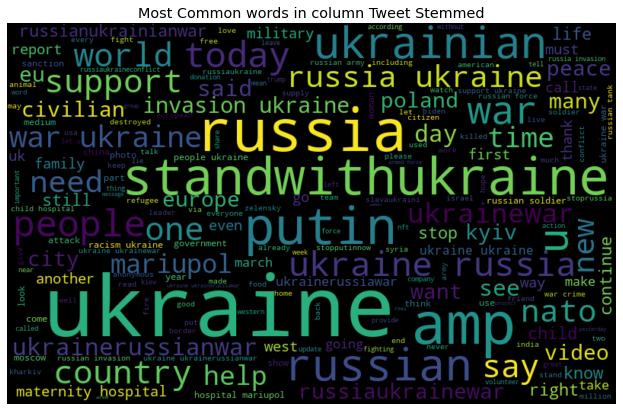

In [145]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in data['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

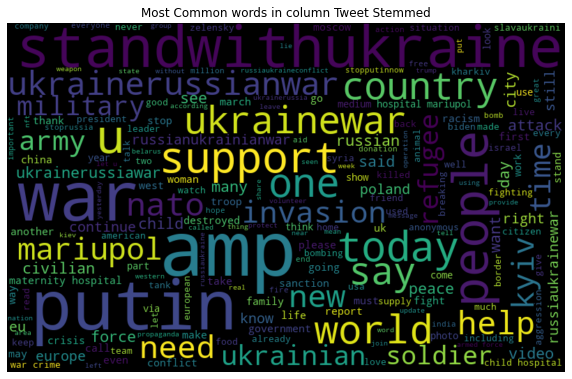

In [90]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in data['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

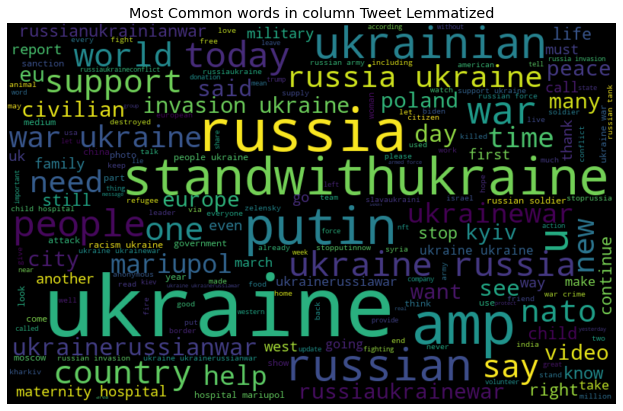

In [146]:
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in data['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

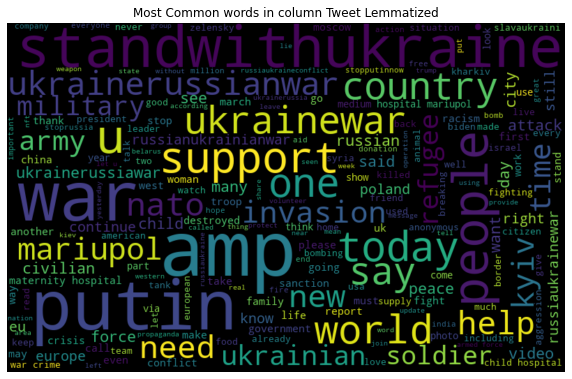

In [91]:
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in data['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

In [92]:
data[['text','clean_tweet',	'tweet_token', 'tweet_token_filtered','tweet_stemmed','tweet_lemmatized']].head(3)

,text,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
4557585,i'm still trying to work out how i decided the...,am still trying to work out how decided the ou...,"[am, still, trying, to, work, out, how, decide...","[still, trying, work, decided, outcome, world,...",still tri work decid outcom world championship...,still trying work decided outcome world champi...
4557594,"#russianinvasion: ""we don't know if we'll be a...",russianinvasion we do not know if we will be a...,"[russianinvasion, we, do, not, know, if, we, w...","[russianinvasion, know, alive, tomorrow, even,...",russianinvas know aliv tomorrow even evacu tak...,russianinvasion know alive tomorrow even evacu...
4557615,pakistani 🇵🇰 student asma shafique thanking in...,pakistani student asma shafique thanking india...,"[pakistani, student, asma, shafique, thanking,...","[pakistani, student, asma, shafique, thanking,...",pakistani student asma shafiqu thank india res...,pakistani student asma shafique thanking india...


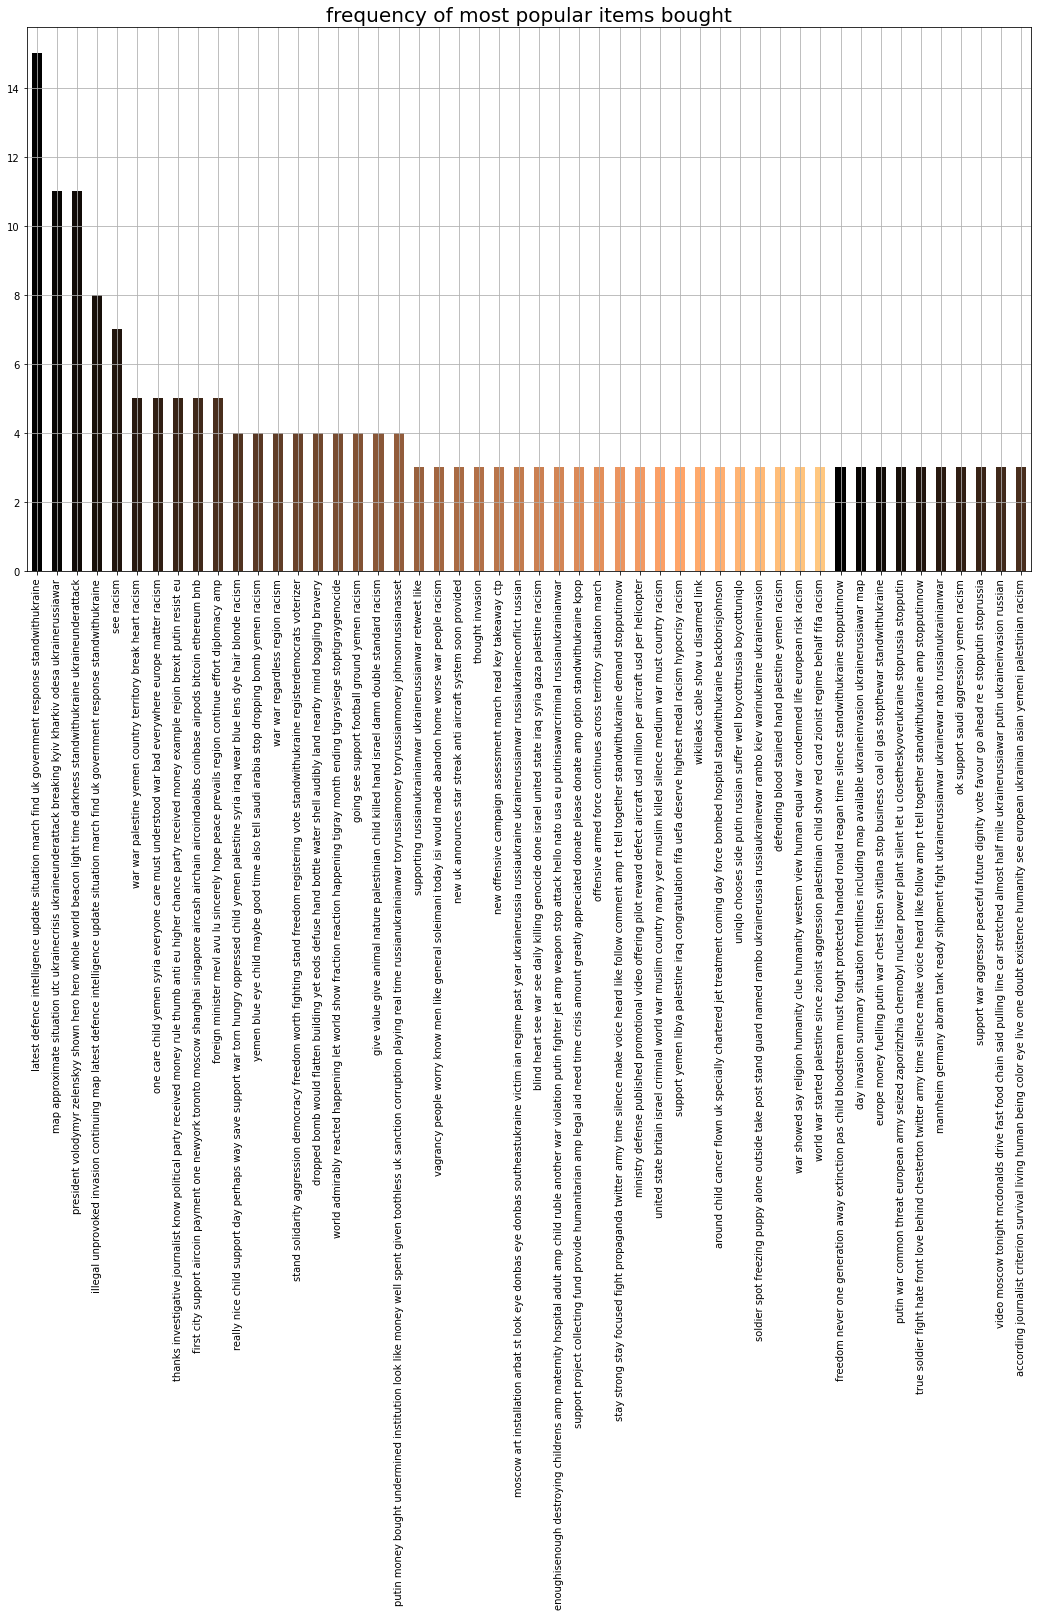

In [93]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 10)
color = plt.cm.copper(np.linspace(0, 1, 40))
data['tweet_lemmatized'].value_counts().head(50).plot.bar(color = color)
plt.title('frequency of most popular items bought', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [114]:
x=data['tweet_token_filtered'].value_counts().head(50)

#x = data.withColumn("word_count", len(data.tweet_token_filtered))

In [115]:
x

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[latest, defence, intelligence, update, situation, march, find, uk, government, response, standwithukraine]                                                                                                                                    15
[map, approximate, situation, utc, ukrainecrisis, ukraineunderattack, breaking, kyiv, kharkiv, odesa, ukrainerussiawar]                                                                                                                        11
[president, volodymyr, zelenskyy, shown, hero, hero, whole, world, beacon, light, time, darkness, standwithukraine, ukraineunderattack]                                                                                                        11
[illegal, unprovoked, invasion, continuing, map, latest, defence, intelligence, update, situation, march, find, uk, government, response, standwithukraine]                                                                                     8
[see, racism]                   

In [116]:
data[[ 'tweet_token_filtered']].head(5)

,tweet_token_filtered
4557585,"[still, trying, work, decided, outcome, world,..."
4557594,"[russianinvasion, know, alive, tomorrow, even,..."
4557615,"[pakistani, student, asma, shafique, thanking,..."
4557628,"[every, secret, finally, makes, way, public, f..."
4557639,"[didyouknow, holdersairdrop, type, airdrop, gi..."


In [132]:
df_tokenized.sort_values(by=0, ascending=False, inplace=True)
df_tokenized

,index,0
989,latest defence intelligence update situation m...,15
3599,map approximate situation utc ukrainecrisis uk...,11
903,president volodymyr zelenskyy shown hero hero ...,11
6640,illegal unprovoked invasion continuing map lat...,8
1697,see racism,7
...,...,...
5205,great reset begun economy meltdown due tough i...,1
5206,fm said tue denunciation alice weidel leader a...,1
5207,confirms used thermobaric weapon say uk minist...,1
5208,onedegreeforukraine lowering thermostat year s...,1


In [133]:
data[[ 'tweet_stemmed']].head(5)

,tweet_stemmed
4557585,still tri work decid outcom world championship...
4557594,russianinvas know aliv tomorrow even evacu tak...
4557615,pakistani student asma shafiqu thank india res...
4557628,everi secret final make way public fight time ...
4557639,didyouknow holdersairdrop type airdrop given b...


In [134]:
data[[ 'tweet_lemmatized']].head(20)

,tweet_lemmatized
4557585,still trying work decided outcome world champi...
4557594,russianinvasion know alive tomorrow even evacu...
4557615,pakistani student asma shafique thanking india...
4557628,every secret finally make way public fighting ...
4557639,didyouknow holdersairdrop type airdrop given b...
4557643,soldier sudan providing intelligence amp leadi...
4557657,said occupied everyone like amp retweet video ...
4557684,forward observer artillery spotter working ins...
4557690,currently inspected expert report technical co...
4557694,rt celebrate name valiant woman resist freedom...


In [135]:


MBA=data[[ 'tweet_lemmatized']]

In [136]:

MBA

,tweet_lemmatized
4557585,still trying work decided outcome world champi...
4557594,russianinvasion know alive tomorrow even evacu...
4557615,pakistani student asma shafique thanking india...
4557628,every secret finally make way public fighting ...
4557639,didyouknow holdersairdrop type airdrop given b...
...,...
5017616,mission asked meeting securitycouncil march di...
5017617,coming tonight maksym borodin mariupol city co...
5017618,little girl singing let go shelter ukraineruss...
5017620,fading war cowardly escape problem peace thoma...


In [137]:
number_of_words = len(data[[ 'tweet_lemmatized']])
print(number_of_words)

15727


Apriori Algoritm and Download related libraries

In [138]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [140]:

MBA.shape

(15727, 1)

In [141]:

MBA

,tweet_lemmatized
4557585,still trying work decided outcome world champi...
4557594,russianinvasion know alive tomorrow even evacu...
4557615,pakistani student asma shafique thanking india...
4557628,every secret finally make way public fighting ...
4557639,didyouknow holdersairdrop type airdrop given b...
...,...
5017616,mission asked meeting securitycouncil march di...
5017617,coming tonight maksym borodin mariupol city co...
5017618,little girl singing let go shelter ukraineruss...
5017620,fading war cowardly escape problem peace thoma...


In [142]:

# import Pandas as pd
import pandas as pd
MBAS=MBA.tweet_lemmatized.str.split(expand=True)

In [143]:
MBAS.shape

(15727, 67)

In [144]:
MBAS.head(30)

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
4557585,still,trying,work,decided,outcome,world,championship,please,send,abuse,...,None,None,None,None,None,None,None,None,None,None
4557594,russianinvasion,know,alive,tomorrow,even,evacuated,take,day,get,polish,...,None,None,None,None,None,None,None,None,None,None
4557615,pakistani,student,asma,shafique,thanking,india,rescuing,prime,minister,bangladesh,...,None,None,None,None,None,None,None,None,None,None
4557628,every,secret,finally,make,way,public,fighting,time,africa,shake,...,None,None,None,None,None,None,None,None,None,None
4557639,didyouknow,holdersairdrop,type,airdrop,given,beneficiary,holding,particular,crypto,asset,...,None,None,None,None,None,None,None,None,None,None
4557643,soldier,sudan,providing,intelligence,amp,leading,campaign,create,division,among,...,None,None,None,None,None,None,None,None,None,None
4557657,said,occupied,everyone,like,amp,retweet,video,one,like,rt,...,None,None,None,None,None,None,None,None,None,None
4557684,forward,observer,artillery,spotter,working,inside,apartment,block,kiev,neighborhood,...,None,None,None,None,None,None,None,None,None,None
4557690,currently,inspected,expert,report,technical,condition,aircraft,please,wait,official,...,None,None,None,None,None,None,None,None,None,None
4557694,rt,celebrate,name,valiant,woman,resist,freedom,country,None,None,...,None,None,None,None,None,None,None,None,None,None


In [186]:
MBAS.fillna('!',inplace=True)
trans = MBAS.values.tolist()

In [187]:
trans

[['still',
  'trying',
  'work',
  'decided',
  'outcome',
  'world',
  'championship',
  'please',
  'send',
  'abuse',
  'vladimir',
  'putin',
  'kremlin',
  'moscow',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!'],
 ['russianinvasion',
  'know',
  'alive',
  'tomorrow',
  'even',
  'evacuated',
  'take',
  'day',
  'get',
  'polish',
  'border',
  'route',
  'say',
  'oluwale',
  'kennard',
  'nigerian',
  'medical',
  'student',
  'uk',
  'studying',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',

In [188]:
for i in range(len(trans)):
    trans[i] = [x for x in trans[i] if not x=='!']

In [189]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(trans).transform(trans)
transactions = pd.DataFrame(te_ary, columns=te.columns_)

In [192]:
freq_items = apriori(transactions, min_support=0.02, use_colnames=True)
freq_items.head(7)

,support,itemsets
0,0.023526,(also)
1,0.106187,(amp)
2,0.027723,(army)
3,0.033891,(attack)
4,0.054556,(child)
5,0.033954,(city)
6,0.040567,(civilian)


In [193]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [194]:
freq_items.sort_values('length',ascending=False)

,support,itemsets,length
82,0.020220,"(war, standwithukraine)",2
81,0.030076,"(war, putin)",2
80,0.022445,"(hospital, maternity)",2
79,0.027850,"(hospital, mariupol)",2
52,0.022827,(see),1
...,...,...,...
26,0.036371,(like),1
25,0.023463,(life),1
24,0.052394,(kyiv),1
23,0.022255,(know),1


In [195]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.02)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hospital),(mariupol),0.043301,0.055446,0.027850,0.643172,11.599958,0.025449,2.647083
1,(mariupol),(hospital),0.055446,0.043301,0.027850,0.502294,11.599958,0.025449,1.922215
2,(hospital),(maternity),0.043301,0.023844,0.022445,0.518355,21.739133,0.021413,2.026713
3,(maternity),(hospital),0.023844,0.043301,0.022445,0.941333,21.739133,0.021413,16.307364
4,(war),(putin),0.155974,0.136771,0.030076,0.192825,1.409838,0.008743,1.069445


In [196]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(maternity),(hospital),0.023844,0.043301,0.022445,0.941333,21.739133,0.021413,16.307364
0,(hospital),(mariupol),0.043301,0.055446,0.027850,0.643172,11.599958,0.025449,2.647083
2,(hospital),(maternity),0.043301,0.023844,0.022445,0.518355,21.739133,0.021413,2.026713
1,(mariupol),(hospital),0.055446,0.043301,0.027850,0.502294,11.599958,0.025449,1.922215
5,(putin),(war),0.136771,0.155974,0.030076,0.219898,1.409838,0.008743,1.081943
4,(war),(putin),0.155974,0.136771,0.030076,0.192825,1.409838,0.008743,1.069445
7,(standwithukraine),(war),0.133655,0.155974,0.020220,0.151284,0.969935,-0.000627,0.994475
6,(war),(standwithukraine),0.155974,0.133655,0.020220,0.129637,0.969935,-0.000627,0.995383


In [197]:
MBAS[1].value_counts().head(50)

war          185
putin        151
people       110
u            107
child         74
amp           74
day           72
world         71
video         67
say           64
soldier       64
mariupol      62
force         60
minister      59
woman         54
president     52
news          51
footage       50
support       48
morning       48
today         48
time          47
help          47
like          44
one           43
army          43
stand         42
attack        41
nato          41
invasion      40
military      40
need          39
see           38
hospital      37
ukrainian     37
bomb          37
kyiv          37
foreign       34
country       34
volodymyr     34
defense       33
medium        33
new           33
civilian      33
student       33
tank          33
march         33
maternity     32
state         32
zelensky      32
Name: 1, dtype: int64

In [198]:
MBAS[2].value_counts().head(50)

war                 175
putin               171
!                   151
amp                 107
people              101
u                    85
force                76
today                75
say                  74
child                71
mariupol             68
world                67
hospital             58
country              56
invasion             51
day                  51
support              50
one                  50
minister             50
soldier              50
standwithukraine     49
woman                49
medium               49
kyiv                 48
show                 47
attack               47
nato                 46
maternity            44
president            44
army                 43
situation            43
tank                 42
call                 41
video                41
civilian             40
like                 38
need                 38
military             37
peace                37
said                 36
right                35
help            

In [199]:
MBAS[3].value_counts().head(50)

!                    361
war                  200
putin                157
amp                  113
people               107
u                     98
today                 79
standwithukraine      76
force                 74
world                 74
child                 74
mariupol              68
hospital              68
civilian              58
day                   55
support               54
say                   53
maternity             50
soldier               50
refugee               50
country               49
like                  49
tank                  48
nato                  48
kyiv                  48
help                  45
attack                45
military              44
army                  43
destroyed             43
woman                 42
invasion              38
need                  36
ukrainewar            36
ukrainerussianwar     35
stop                  35
minister              35
kharkiv               35
million               34
peace                 33


In [200]:
MBAS[4].value_counts().head(50)

!                    678
war                  171
putin                122
people               112
amp                  107
hospital              94
child                 91
mariupol              83
support               75
u                     72
today                 71
world                 70
standwithukraine      68
kyiv                  61
woman                 57
country               54
maternity             54
help                  53
civilian              51
city                  50
nato                  49
force                 49
one                   48
military              47
say                   47
ukrainerussianwar     44
ukrainewar            43
tank                  42
time                  41
day                   40
like                  39
attack                39
destroyed             38
soldier               37
need                  34
fight                 33
right                 33
army                  33
call                  33
weapon                31


In [201]:
MBAS[5].value_counts().head(50)

!                     1108
war                    162
putin                  147
amp                    126
people                 107
mariupol                93
hospital                88
u                       81
standwithukraine        81
kyiv                    77
world                   75
child                   67
support                 64
today                   56
country                 55
civilian                54
like                    53
attack                  53
help                    51
ukrainewar              50
one                     49
refugee                 47
woman                   46
day                     46
ukrainerussianwar       46
city                    45
nato                    44
invasion                42
march                   42
say                     42
killed                  41
force                   36
military                34
soldier                 33
time                    33
near                    32
humanitarian            32
r

In [202]:
MBAS[6].value_counts().head(50)

!                    1617
war                   181
putin                 126
amp                   122
standwithukraine      100
people                 91
mariupol               80
kyiv                   79
u                      74
hospital               63
child                  63
support                63
world                  61
country                59
ukrainewar             55
invasion               53
civilian               50
ukrainerussianwar      49
city                   48
force                  46
attack                 46
help                   41
one                    41
need                   40
say                    40
nato                   40
day                    40
military               38
time                   37
like                   37
tank                   36
humanitarian           35
poland                 34
maternity              33
today                  33
ukrainerussiawar       32
state                  30
weapon                 30
woman       

In [203]:
MBAS[26].value_counts().head(100)

!                   15178
nidhi                  22
amp                    16
standwithukraine       13
putin                   8
                    ...  
home                    1
fckptn                  1
archaeology             1
prostitution            1
breakdown               1
Name: 26, Length: 100, dtype: int64

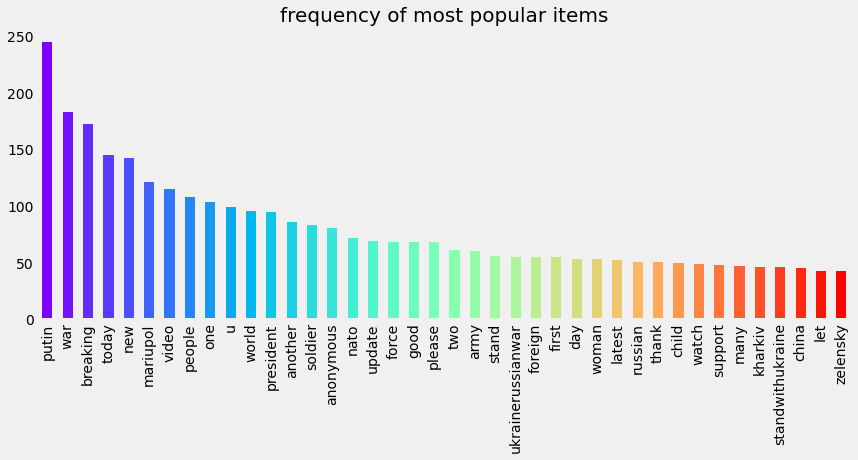

In [204]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
MBAS[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [205]:
y = MBAS[0].value_counts().head(50).to_frame()
y.index
y.head()

,0
putin,245
war,183
breaking,172
today,145
new,142


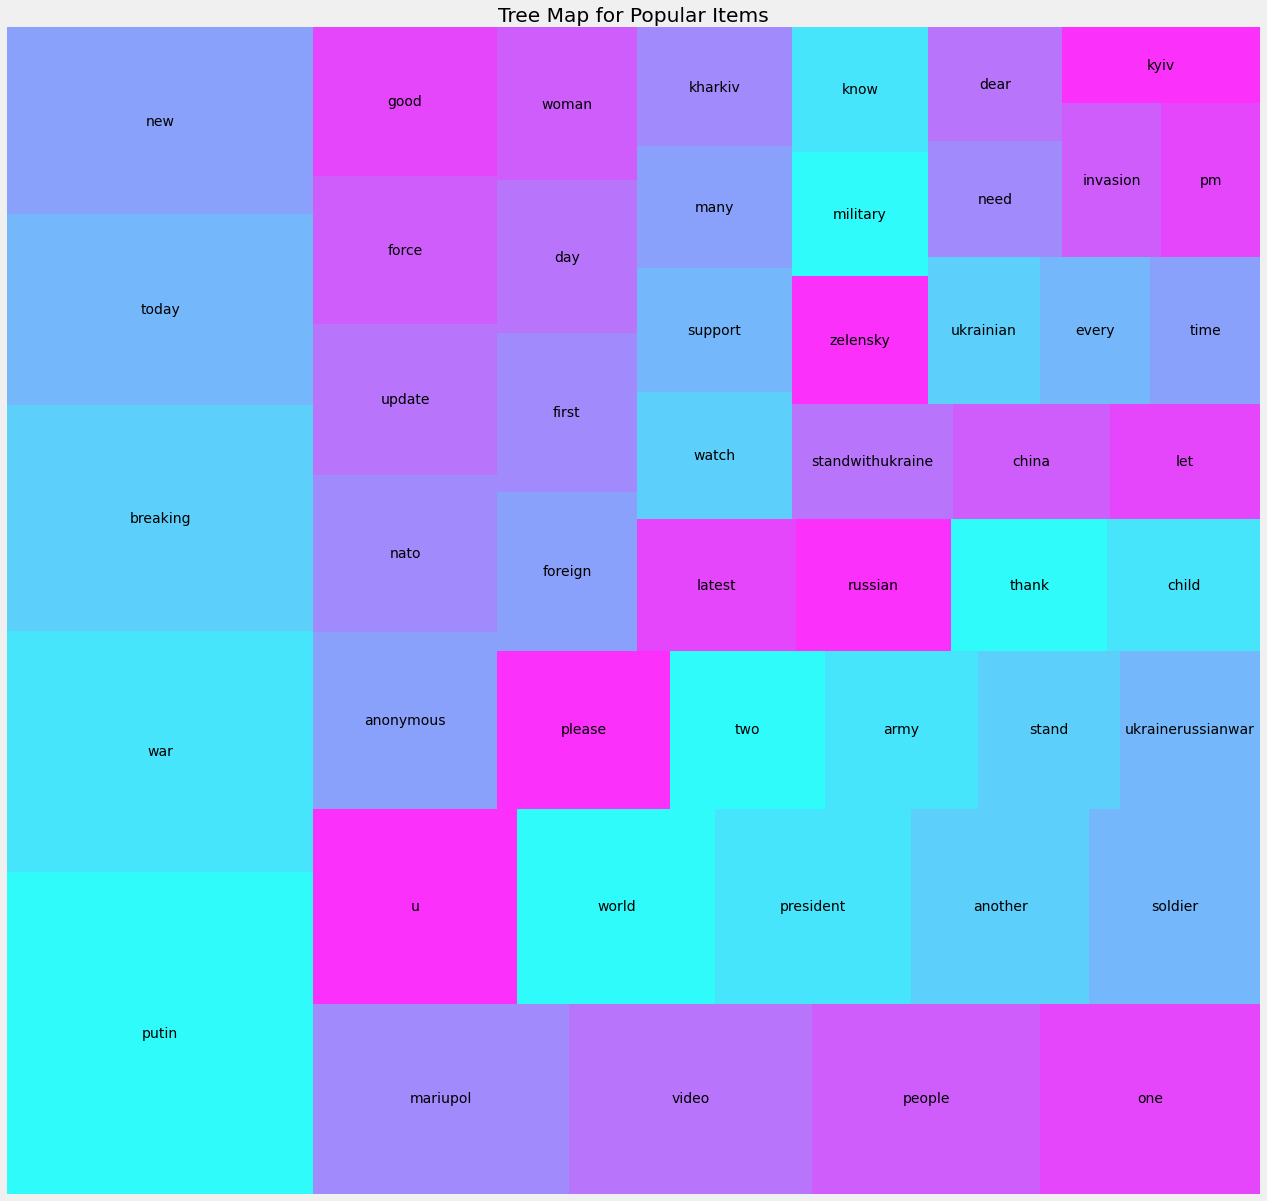

In [206]:

# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1,10))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

https://www.kaggle.com/code/jayantmathur/market-basket-analysis/notebook

https://www.kaggle.com/code/rashikrahmanpritom/apriori-implementation

https://www.kaggle.com/code/sajidcse/market-basket-analysis/notebook

https://github.com/silvuple/Basket-Analysis-with-FP-Growth/blob/master/Basket-Analysis-FPGrowth.ipynb